# Check skew in data

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import lognorm,boxcox,norm
from sklearn.preprocessing import PowerTransformer


In [2]:
Data=pd.read_csv('1000_y_data.csv')

In [3]:
# Chest_deflection = Data.columns[23]
# pelvis = Data.columns[24]
X = Data[Data.columns[1:23]]
y = Data['rib24']

# cv = KFold(n_splits=10)

In [4]:
y.skew()

8.902984791686581

# Initial Data

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rib24', ylabel='Density'>

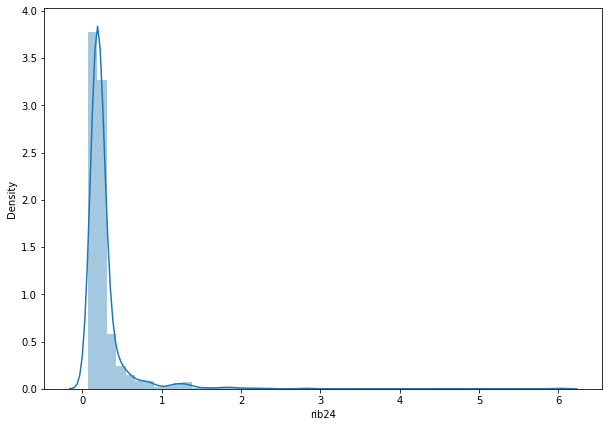

In [5]:
plt.figure(figsize=(10,7))
sns.distplot(y,hist=True)

# SQRT

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.992873475680819

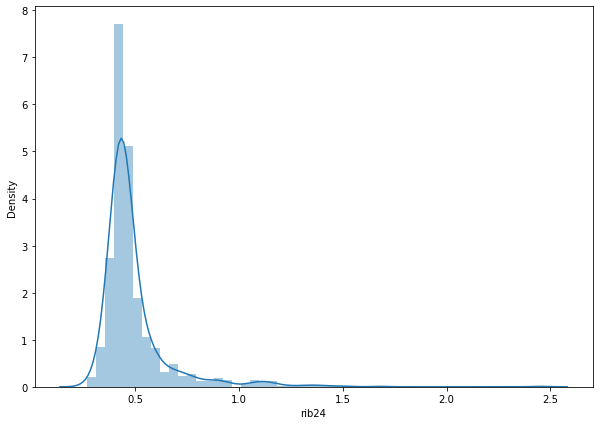

In [6]:
y_2 = np.sqrt(y)
plt.figure(figsize=(10,7))
sns.distplot(y_2,hist=True)
y_2.skew()

# Cube root

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.164136065704174

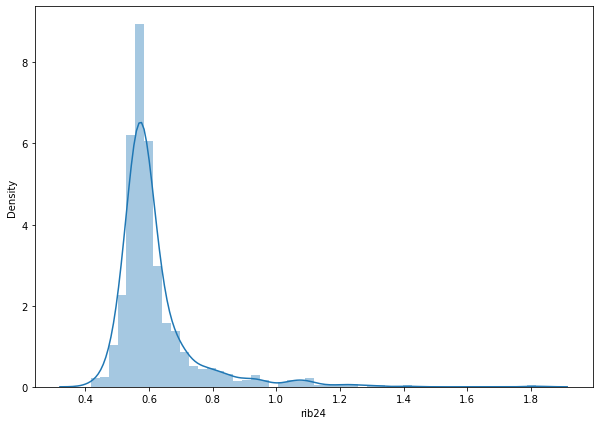

In [7]:
y_3 = np.cbrt(y)
plt.figure(figsize=(10,7))
sns.distplot(y_3,hist=True)
y_3.skew()

# Log1p

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.0396933321863497

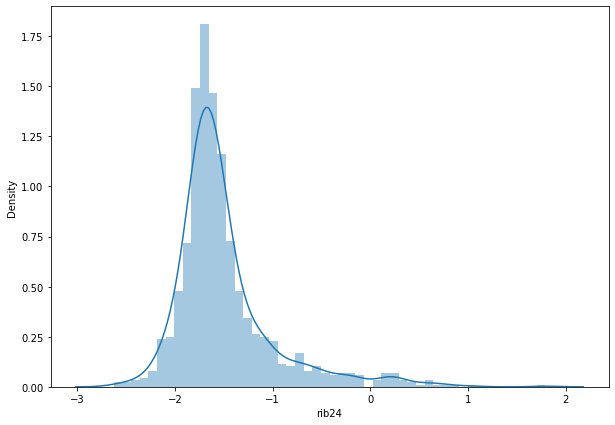

In [8]:
y_lg = np.log(y)
plt.figure(figsize=(10,7))
sns.distplot(y_lg,hist=True)
y_lg.skew()

# Powerrr!

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    0.41707
dtype: float64

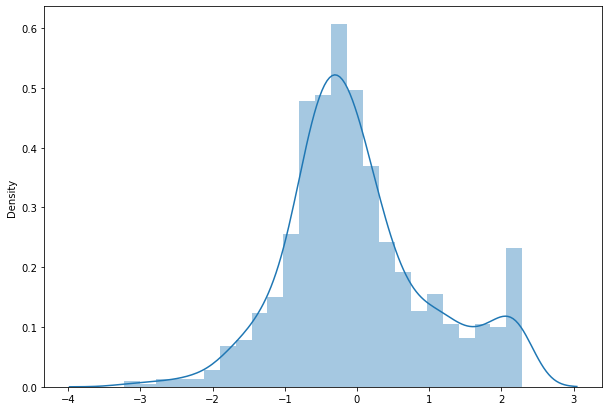

In [9]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

ax=y.values.reshape(-1, 1)
yu = power.fit_transform(ax)
plt.figure(figsize=(10,7))
sns.distplot(yu,hist=True)
yu=pd.DataFrame(yu)
yu.skew()

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    8.902985
dtype: float64

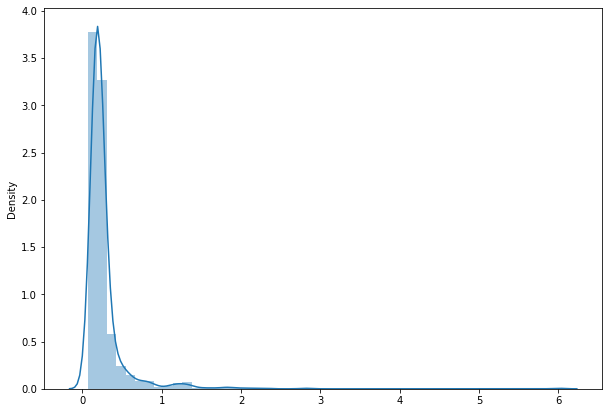

In [10]:
lk=power.inverse_transform(yu)

plt.figure(figsize=(10,7))
sns.distplot(lk,hist=True)
yu=pd.DataFrame(lk)
yu.skew()